<a href="https://colab.research.google.com/github/ssyyjj1012/data-analysis/blob/main/04_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC_(Preprocessing)_(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

# unicode 에러
plt.rcParams['axes.unicode_minus'] = False

## 표준화 (Standardization)

표준화는 데이터의 **평균을 0 분산 및 표준편차를 1**로 만들어 줍니다.

**표준화를 하는 이유**

- 서로 **다른 통계 데이터들을 비교하기 용이**하기 때문입니다.
- 표준화를 하면 평균은 0, 분산과 표준편차는 1로 만들어 데이터의 **분포를 단순화 시키고, 비교를 용이**하게 합니다.

### 표준화 공식

$\Large z = \frac{(X - \mu)}{\sigma}$

### 샘플데이터

iris 붓꽃 샘플데이터를 가져옵니다.

In [2]:
from sklearn.datasets import load_iris

- iris 데이터를 가져와 `iris` 변수에 대입합니다.

In [3]:
# 코드를 입력해 주세요
iris = load_iris()

`iris` 데이터를 활용하여 **DataFrame을 생성**해 주세요

In [4]:
# 코드를 입력해 주세요
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sepal length (cm)</th>
      <th>sepal width (cm)</th>
      <th>petal length (cm)</th>
      <th>petal width (cm)</th>
      <th>target</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>5.1</td>
      <td>3.5</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4.9</td>
      <td>3.0</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4.7</td>
      <td>3.2</td>
      <td>1.3</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4.6</td>
      <td>3.1</td>
      <td>1.5</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5.0</td>
      <td>3.6</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

4개의 feature 데이터 중 `sepal length (cm)`의 feature만 임의로 선택하여 `X` 변수에 저장합니다.

`sepal length (cm)` 컬럼만 `X` 변수에 저장

In [5]:
# 코드를 입력해 주세요
X = df['sepal length (cm)']

### 표준화 코드 구현

표준화를 Python으로 직접 구현하면 다음과 같습니다. 공식을 그대로 코드로 옮기면 됩니다.

- `X_` 변수에 바로 위에서 만든 `X` 변수를 표준화를 거친 후 결과를 담습니다.

$\Large z = \frac{(X - \mu)}{\sigma}$

In [6]:
# 코드를 입력해 주세요
X_ = (X - X.mean()) / X.std()

### 시각화

**시각화**로 표준화의 전과 후를 비교합니다.

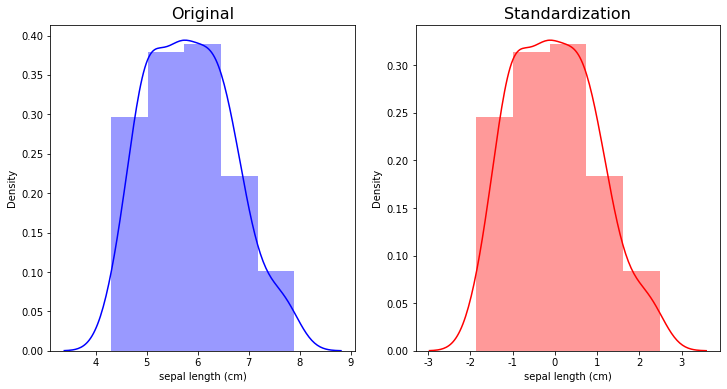

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_, bins=5, color='r')
plt.title('Standardization', fontsize=16)
plt.show()

### iris 붓꽃 데이터 분포 시각화

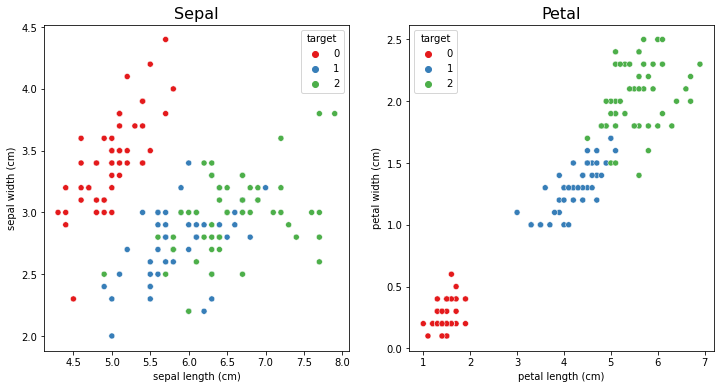

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(df['sepal length (cm)'], df['sepal width (cm)'], hue=df['target'], palette='Set1')
plt.title('Sepal', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue=df['target'], palette='Set1')
plt.title('Petal', fontsize=16)
plt.show()

## StandardScaler의 활용

`sklearn.preprocesssing` 에 `StandardScaler`로 표준화 (Standardization) 할 수 있습니다.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
x = df.drop('target', axis = 1)

In [11]:
# 코드를 입력해 주세요
scaler = StandardScaler()

In [12]:
scaler.fit(x)
scaler.transform(x)[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

feature 데이터를 표준화 합니다. (표준화 할 때는 Y 값은 제외합니다.)

In [13]:
# 코드를 입력해 주세요
scaled_data = scaler.fit_transform(x)

In [14]:
scaled_data[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [15]:
# 코드검증
round(scaled_data.mean(), 2), scaled_data.std()

(-0.0, 1.0)

<p><strong>[출력 결과]</strong></p><pre>(-0.0, 1.0)</pre>

### Scale 전, 후 비교 (시각화)

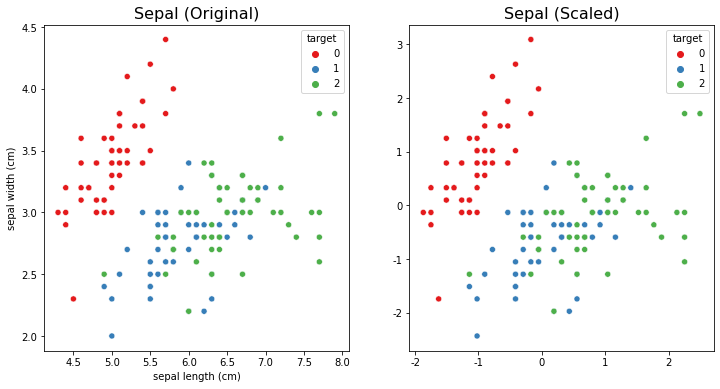

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(df['sepal length (cm)'], df['sepal width (cm)'], hue=df['target'], palette='Set1')
plt.title('Sepal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 1], hue=df['target'], palette='Set1')
plt.title('Sepal (Scaled)', fontsize=16)
plt.show()

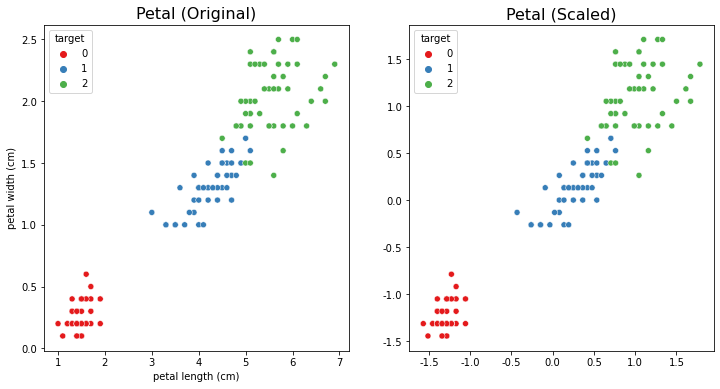

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue=df['target'], palette='Set1')
plt.title('Petal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(scaled_data[:, 2], scaled_data[:, 3], hue=df['target'], palette='Set1')
plt.title('Petal (Scaled)', fontsize=16)
plt.show()

## 정규화 (Normalization)

정규화 (Normalization)도 표준화와 마찬가지로 데이터의 스케일을 조정합니다.

정규화가 표준화와 다른 가장 큰 특징은 **모든 데이터가 0 ~ 1 사이의 값**을 가집니다.

즉, 최대값은 1, 최소값은 0으로 데이터의 범위를 조정합니다.

### 정규화 코드 구현

`sepal length (cm)` 컬럼만 `X` 변수에 저장

In [18]:
# 코드를 입력해 주세요
x = df.drop('target', axis = 1)

### 정규화 공식

In [19]:
Image(url='https://mblogthumb-phinf.pstatic.net/MjAxODA3MzFfMjgx/MDAxNTMzMDIxNzg5MTkz.odx32KoGhDrjwJHgjb_NslL1Nlmsp4veLz6OULb2q00g.5Ynl7GOds1YAgBgJ_TSiuWjHZfrNWPq3hsHtwCjvNP0g.PNG.angryking/image_4532734831533021765958.png?type=w800', width=200)

정규화 코드 구현합니다.

In [20]:
# 코드를 입력해 주세요
X_ = (X - X.min()) / (X.max() - X.min())

시각화

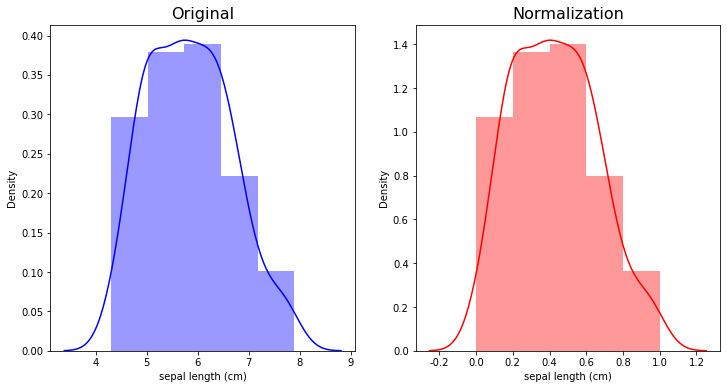

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')
plt.title('Original', fontsize=16)

plt.subplot(1, 2, 2)
sns.distplot(X_, bins=5, color='r')
plt.title('Normalization', fontsize=16)
plt.show()

## MinMaxScaler의 활용

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# 코드를 입력해 주세요
minmax_scaler = MinMaxScaler()

- feature 4개를 모두 변환합니다.
- 변환된 결과는 `scaled_data2`에 대입합니다.

In [24]:
# 코드를 입력해 주세요
x = df.drop('target', axis = 1)
scaled_data2 = minmax_scaler.fit_transform(x)

In [25]:
scaled_data2[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [26]:
# 코드검증
scaled_data2.min(), scaled_data2.max()

(0.0, 1.0)

<p><strong>[출력 결과]</strong></p><pre>(0.0, 1.0)</pre>

### Scale 전, 후 비교 (시각화)

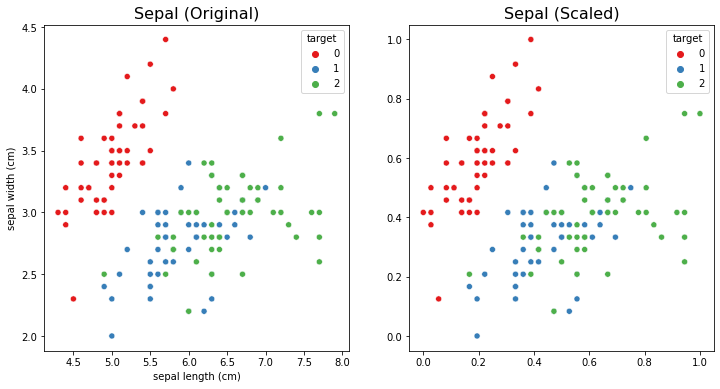

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(df['sepal length (cm)'], df['sepal width (cm)'], hue=df['target'], palette='Set1')
plt.title('Sepal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(scaled_data2[:, 0], scaled_data2[:, 1], hue=df['target'], palette='Set1')
plt.title('Sepal (Scaled)', fontsize=16)
plt.show()

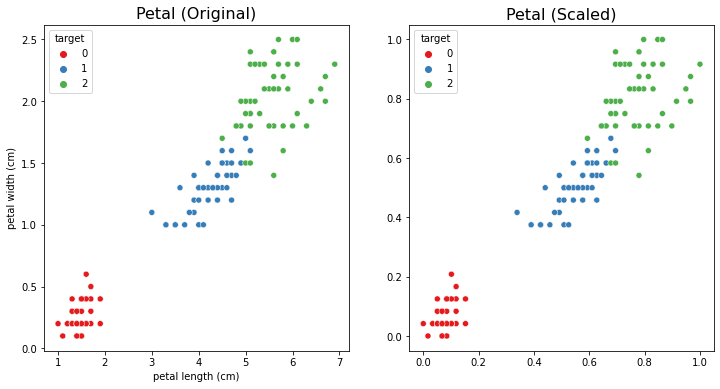

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue=df['target'], palette='Set1')
plt.title('Petal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(scaled_data2[:, 2], scaled_data2[:, 3], hue=df['target'], palette='Set1')
plt.title('Petal (Scaled)', fontsize=16)
plt.show()

## Label Encoder

머신러닝 알고리즘은 문자열 데이터를 입력으로 받지 못합니다. 

따라서, 데이터가 가지고 있는 **범주형(Categorical) 데이터는 반드시 숫자형(Numerical)으로 변환**해주어야 합니다.

`LabelEncoder`는 범주형(Categorical) 데이터를 수치형으로 인코딩(encoding) 합니다.

여기서 **인코딩(encoding)** 이란, *문자형 -> 숫자형 데이터로 변환* 해주는 것을 의미합니다.

### 샘플 데이터 (tips)

tips 데이터를 load 합니다.

In [29]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
# day 컬럼의 분포 확인
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

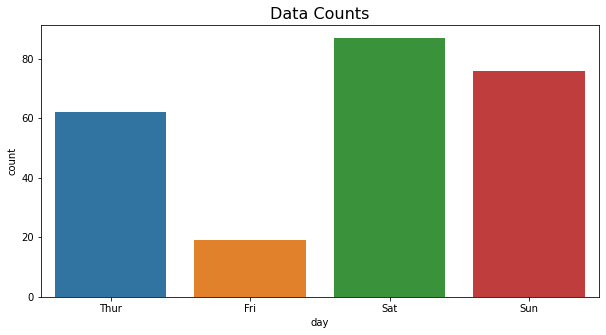

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(tips['day'])
plt.title('Data Counts', fontsize=16)
plt.show()

만약 `tips`데이터의 `day`컬럼에서의 값(value)인 [Thur(목), Fri(금), Sat(토), Sun(일)] 을 인코딩(encoding) 해주지 않고 그대로 머신러닝 모델에 학습데이터로 feed한다면 **error가 발생**합니다.

### apply를 활용한 인코딩(encoding)

아래와 같이 `encoding`이라는 함수를 정의한 후 변환하고자 하는 컬럼에 `apply`해줌으로써 인코딩을 진행합니다.

In [32]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
# 코드를 입력해 주세요
def encoding(data):
    if data == 'Thur':
        return 0
    elif data == 'Fri':
        return 1
    elif data == 'Sat':
        return 2
    elif data == 'Sun':
        return 3

- `converted` 변수에 변환된 결과를 대입합니다.
- 대입한 후 결과에 대한 분포를 확인합니다.

In [34]:
# 코드를 입력해 주세요
converted = tips['day'].apply(encoding)
converted.value_counts()

2    87
3    76
0    62
1    19
Name: day, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>2    87
3    76
0    62
1    19
Name: day, dtype: int64</pre>

인코딩 한 값을 간단히 시각화 해 볼 수 있습니다.

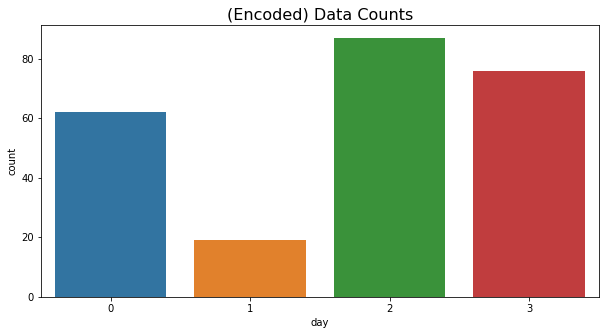

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(converted)
plt.title('(Encoded) Data Counts', fontsize=16)
plt.show()

### LabelEncoder 활용

위와 같이 `apply`로 변환하고자 하는 컬럼 별로 인코딩을 해줄 수 있지만, `sklearn.preprocessing.LabelEncoder`를 활용하여 쉽게 인코딩할 수 있습니다.

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
# 코드를 입력해 주세요
encoder =  LabelEncoder()

In [38]:
# 코드를 입력해 주세요
encoded =  encoder.fit_transform(tips['day'])

In [39]:
encoded

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

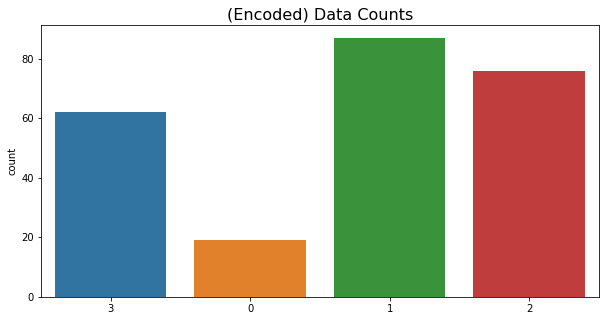

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(encoded, order=[3, 0, 1, 2])
plt.title('(Encoded) Data Counts', fontsize=16)
plt.show()

`LabelEncoder`를 사용하면 원래 class 의 label도 확인할 수 있습니다.

In [41]:
encoder.classes_

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

### Inverse Transform(역변환)

머신러닝 학습을 위하여 어쩔 수 없이 범주형(Categorical) 데이터를 숫자형으로 변환하였다면, 이제 결과 확인을 위하여 다시 역변환이 필요합니다.

이는 `LabelEncoder`의 `inverse_transform`을 사용하여 쉽게 역변환할 수 있습니다.

In [42]:
inversed = encoder.inverse_transform(encoded)
inversed

array(['Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Sun', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri', 'Fri',
       'Fri', 'Fri', 'Fri', 'Fri', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat',
       'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sun', 'Sun', 'Sun', 'Sun',
       'Sun', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur', 'Thur',
       'Thur',

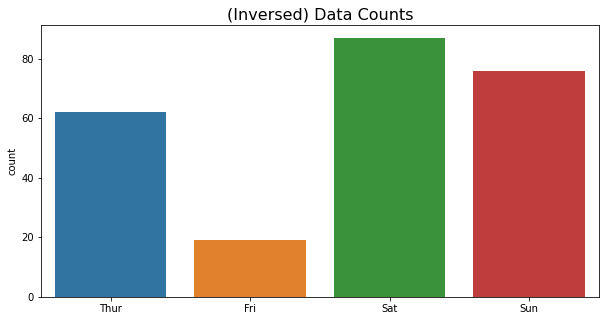

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(inversed, order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('(Inversed) Data Counts', fontsize=16)
plt.show()